Epoch 1/100


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.3905 - val_loss: 0.0925
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.3615 - val_loss: 0.0832
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.3334 - val_loss: 0.0744
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 0.3061 - val_loss: 0.0662
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.2795 - val_loss: 0.0585
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.2534 - val_loss: 0.0515
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.2279 - val_loss: 0.0451
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.2030 - val_loss: 0.0396
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.1788 - val_loss: 0.0351
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.1555 - val_loss: 0.0318
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.1336 - val_loss: 0.0302
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.1133 - val_loss:

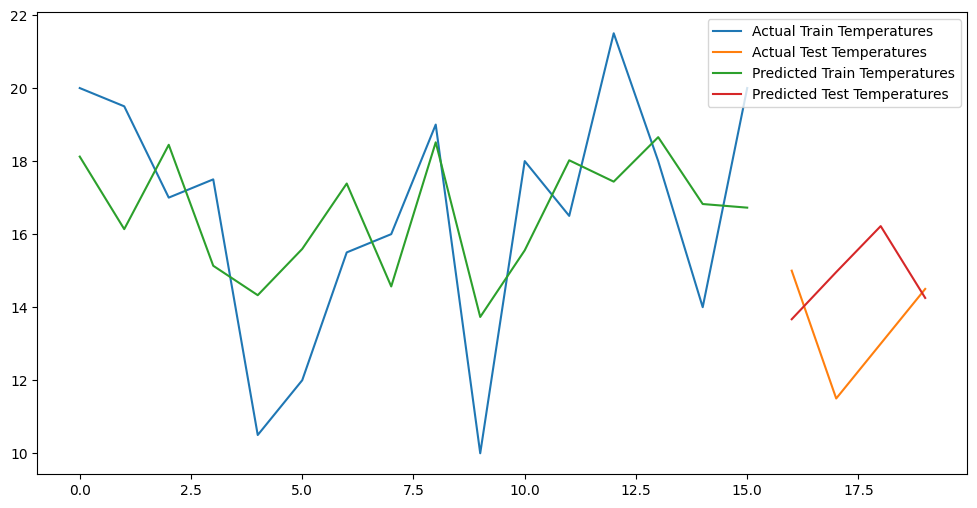

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load your data
data = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\daily_temperature.csv', usecols=[1])  # Read only the Temperature column

# Convert to numpy array
temperature_data = data.values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
temperature_data = scaler.fit_transform(temperature_data)

# Convert the data to a time series format
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 5  # Use 5 days to predict the next day
X, y = create_dataset(temperature_data, time_step)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions to get actual values
train_predict = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_train_actual)), y_train_actual, label='Actual Train Temperatures')
plt.plot(np.arange(len(y_train_actual), len(y_train_actual) + len(y_test_actual)), y_test_actual, label='Actual Test Temperatures')
plt.plot(np.arange(len(y_train_actual)), train_predict, label='Predicted Train Temperatures')
plt.plot(np.arange(len(y_train_actual), len(y_train_actual) + len(y_test_actual)), test_predict, label='Predicted Test Temperatures')
plt.legend()
plt.show()

# Function to predict the temperature for the next day based on user input
def predict_next_day_temperature(input_sequence):
    # Normalize the input sequence
    input_sequence = np.array(input_sequence).reshape(-1, 1)
    input_sequence = scaler.transform(input_sequence)
    
    # Reshape to match the input shape of the model
    input_sequence = input_sequence.reshape((1, time_step, 1))
    
    # Predict the temperature for the next day
    next_day_prediction = model.predict(input_sequence)
    
    # Inverse transform the prediction to get the actual value
    next_day_prediction = scaler.inverse_transform(next_day_prediction)
    
    return next_day_prediction[0, 0]




In [22]:
# Example user input (temperatures for 5 consecutive days)
user_input = [10.0, 12.5, 11.0, 14.0,13.5]  # Replace with actual user input
predicted_temperature = predict_next_day_temperature(user_input)
print(f'The predicted temperature for the next day is: {predicted_temperature:.2f}°C')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
The predicted temperature for the next day is: 13.67°C
